In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

url = './data/VN30_price.csv'
df = pd.read_csv(url)

2023-05-14 13:12:56.372142: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 13:12:56.470759: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 13:12:56.473176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 13:12:57.978923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Preprocess the data
data = df['VN30'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [3]:
# Create the input and output sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length - 1):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)
seq_length = 10
x, y = create_sequences(data, seq_length)


In [4]:
split_idx = int(len(x)*0.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [5]:
x.shape

(1489, 10)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, validation_split=0.25, epochs=100, batch_size=32)

2023-05-14 13:15:22.059761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 13:15:22.063418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 13:15:22.065596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-14 13:15:22.371069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 13:15:22.373387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 13:15:22.375317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

26/28 [==========================>...] - ETA: 0s - loss: 0.0177

2023-05-14 13:15:28.841906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 13:15:28.846173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 13:15:28.848841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 [==============================] - 7s 55ms/step - loss: 0.0168 - val_loss: 0.0346
Epoch 2/100
28/28 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 3/100
28/28 [==============================] - 1s 20ms/step - loss: 7.7827e-04 - val_loss: 0.0015
Epoch 4/100
28/28 [==============================] - 0s 16ms/step - loss: 7.2785e-04 - val_loss: 0.0013
Epoch 5/100
28/28 [==============================] - 1s 21ms/step - loss: 7.2192e-04 - val_loss: 0.0016
Epoch 6/100
28/28 [==============================] - 0s 17ms/step - loss: 6.9896e-04 - val_loss: 0.0014
Epoch 7/100
28/28 [==============================] - 0s 16ms/step - loss: 7.0359e-04 - val_loss: 0.0014
Epoch 8/100
28/28 [==============================] - 0s 18ms/step - loss: 6.9349e-04 - val_loss: 0.0018
Epoch 9/100
28/28 [==============================] - 1s 24ms/step - loss: 7.1051e-04 - val_loss: 0.0020
Epoch 10/100
28/28 [==============================] - 1s 22ms/step - loss: 7.2608e-0

In [17]:
y_test.shape

(298,)

In [18]:
x_test.shape

(298, 10, 1)

In [19]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform([y_test])



rmse = np.sqrt(np.mean(((predictions - y_true) ** 2)))
print('RMSE: %.2f' % rmse)

mae = np.mean(np.abs(predictions - y_true))
print('MAE: %.2f' % mae)

mape = np.mean(np.abs((predictions - y_true) / y_true)) * 100
print('MAPE: %.2f%%' % mape)


2023-05-14 13:16:36.287748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 13:16:36.289896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 13:16:36.292669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 7ms/step
RMSE: 270.84
MAE: 216.71
MAPE: 17.15%


In [20]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # ME 
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

def adjust(val, length= 6): return str(val).ljust(length)

In [21]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(predictions.flatten(), y_true.flatten())
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0201
me     :  -20.9579
mae    :  26.397
mpe    :  -0.0154
rmse   :  31.3855
corr   :  0.9929
minmax :  0.0201


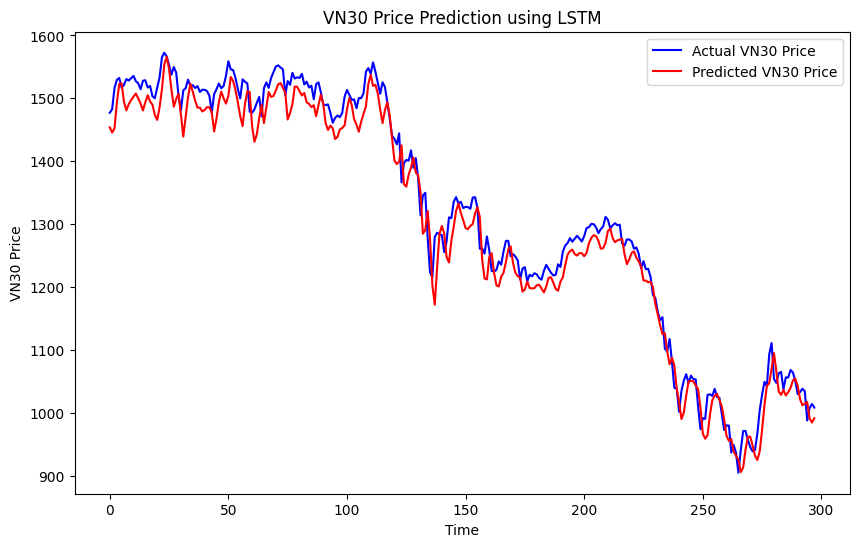

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, y_true.shape[1]), y_true.flatten(), color='blue', label='Actual VN30 Price')
plt.plot(np.arange(0, len(predictions)), predictions.flatten(), color='red', label='Predicted VN30 Price')
plt.title('VN30 Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('VN30 Price')
plt.legend()
plt.show()

In [23]:
len(y_true)

1